# Compare memory calculation codes

Since the initial release of `GWMemory` other packages to compute the waveform have been released.
For example, the `sxs` package has a method to compute memory.

In this notebook we compare the performance of the two packages for a test example.

*NOTE*: the `sxs` code is able to include additional memory terms beyond the dominant energy term considered here.

Thanks to Scott Field for suggesting this test.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import gwsurrogate as gws
from gwmemory import time_domain_memory as tdm
from gwtools import sxs_memory

%matplotlib inline

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
mpl.rcParams["font.size"] = 20
mpl.rcParams["text.usetex"] = True
mpl.rcParams["grid.alpha"] = 0

Create the time domain model. We do this with the `gwsurrogate package`.

For this case, we will use a binary with mass ratio 8 and large aligned spins.

In [3]:
model = gws.LoadSurrogate("NRHybSur3dq8")
chi0 = [0, 0, 0.8]
t = np.arange(-1000, 100, 0.01)
t, h, dyn = model(8, chi0, chi0, times=t, f_low=0)

Loaded NRHybSur3dq8 model


Compute the memory with the two packages.

For comparison, we record the time taken for each code.

In [4]:
print("GWMemory time:")
%time h_mem, times = tdm(h_lm=h, times=t)
print("SXS time:")
%time h_mem_sxs, times_sxs = sxs_memory(h, t)

GWMemory time:


CPU times: user 665 ms, sys: 144 ms, total: 809 ms
Wall time: 808 ms
SXS time:


CPU times: user 21.5 s, sys: 1.15 s, total: 22.6 s
Wall time: 22.6 s


Now we plot the various memory modes along with the mismatches between the waveforms obtained with both methods.

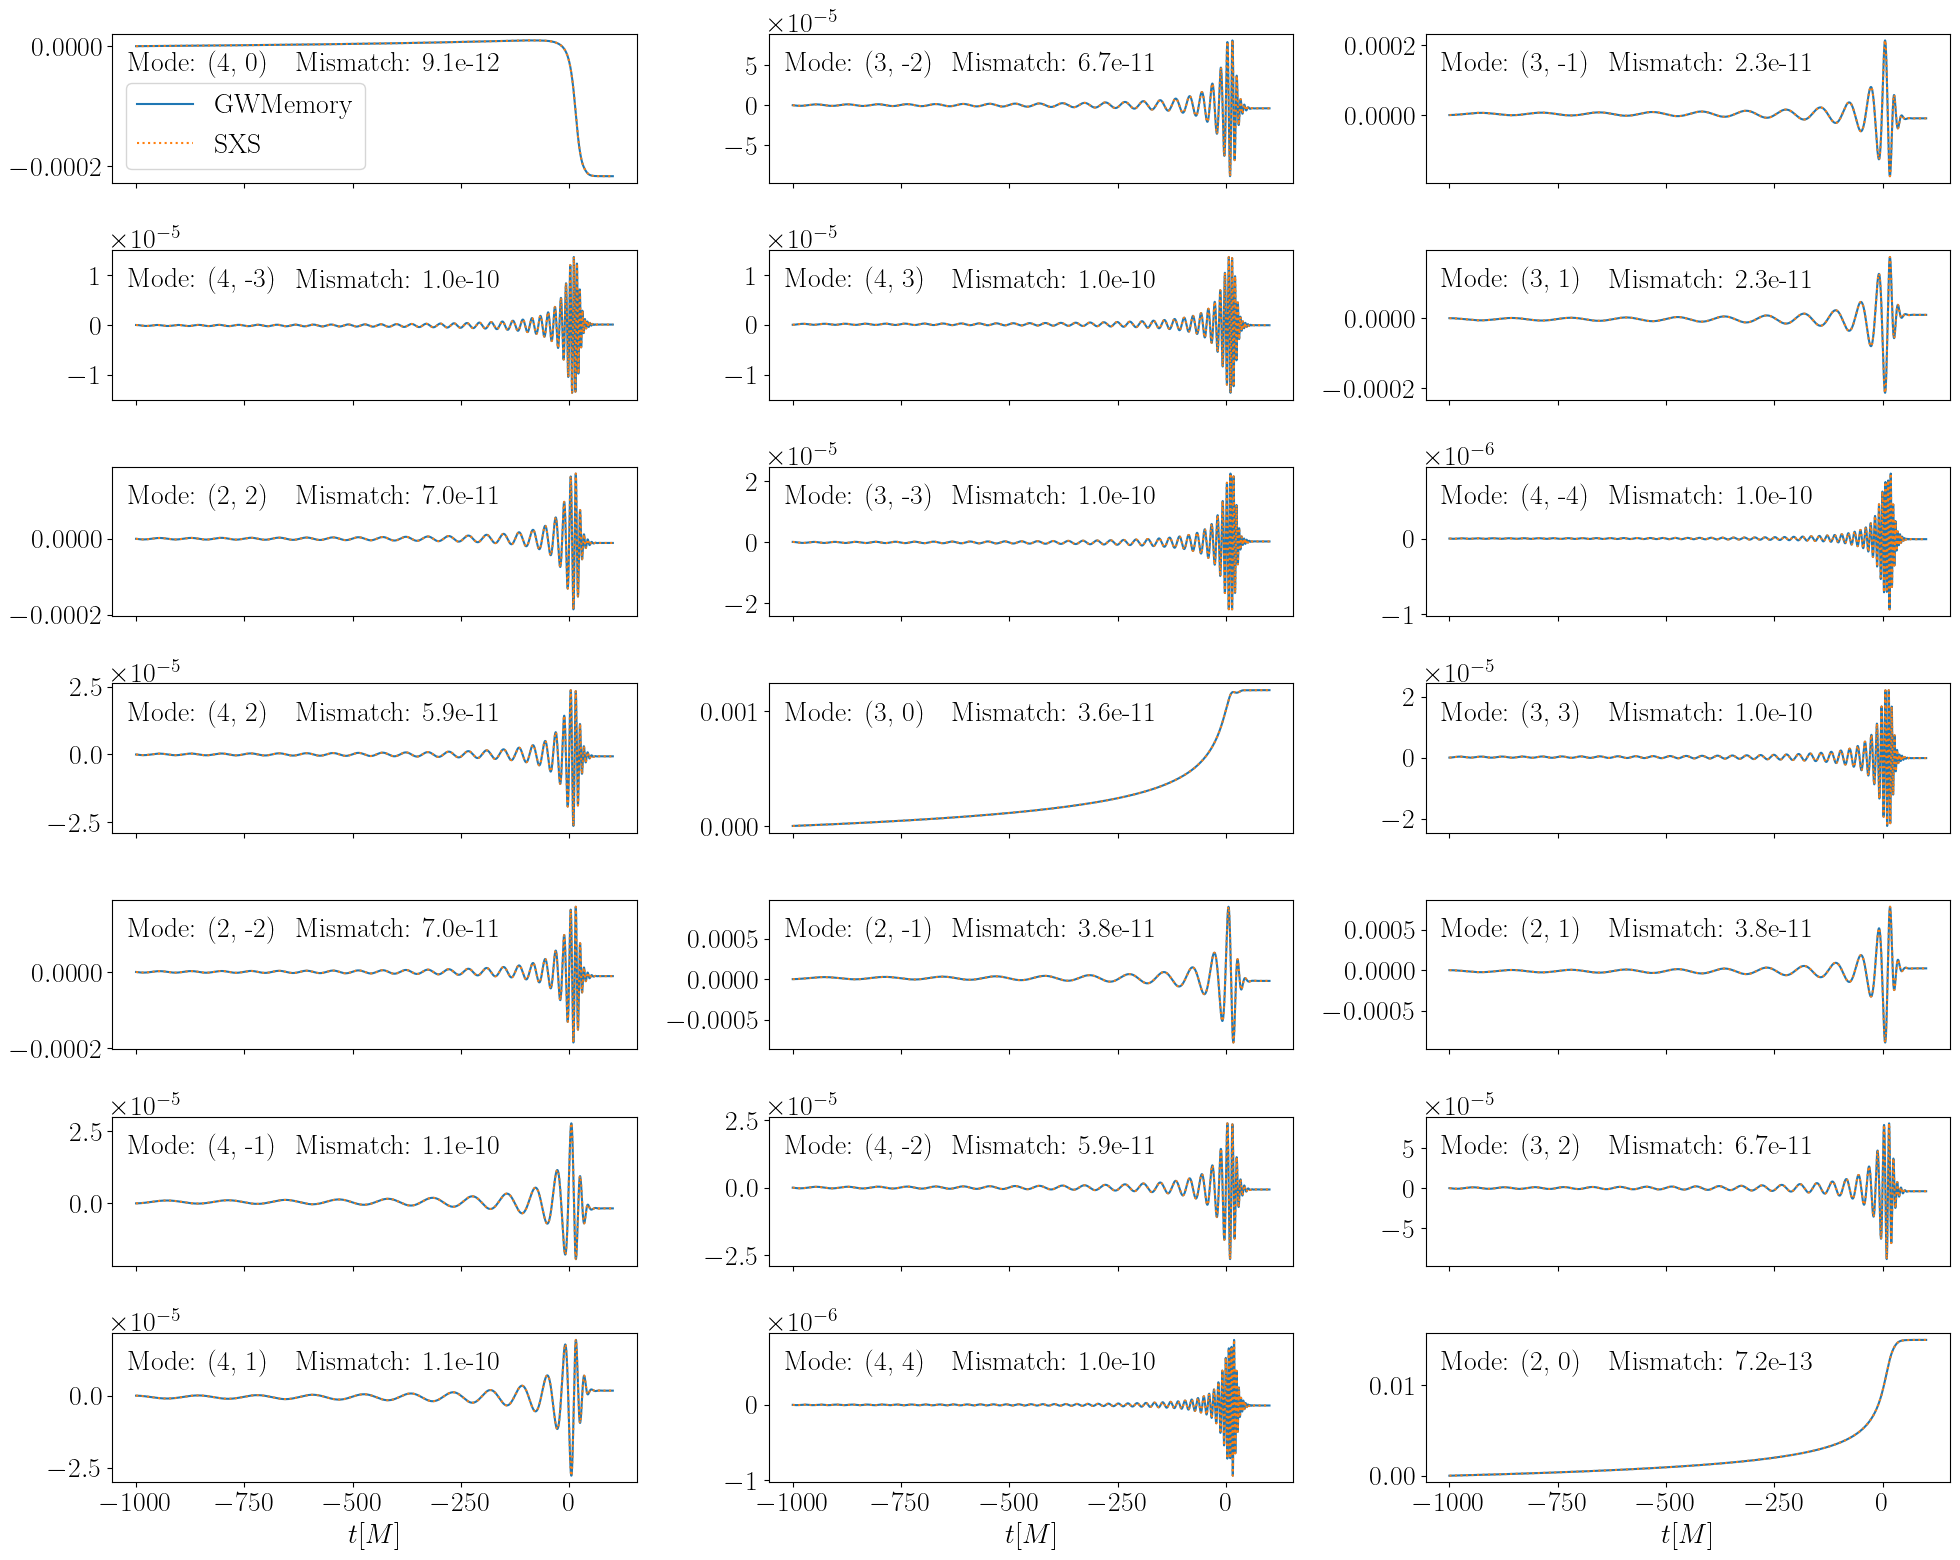

In [5]:
modes = set(h_mem.keys()).intersection(h_mem_sxs.keys())
fig, axes = plt.subplots(nrows=7, ncols=3, sharex=True, figsize=(20, 16))
for ii, mode in enumerate(modes):
    gwmem = h_mem[mode]
    sxsmem = h_mem_sxs[mode]
    overlap = (
        np.vdot(gwmem, sxsmem)
        / np.vdot(gwmem, gwmem) ** 0.5
        / np.vdot(sxsmem, sxsmem) ** 0.5
    )

    ax = axes[ii // 3, ii % 3]
    ax.plot(times, gwmem.real, label="GWMemory")
    ax.plot(times_sxs, sxsmem.real, linestyle=":", label="SXS")
    ax.annotate(f"Mode: ({mode[0]}, {mode[1]})", (0.03, 0.75), xycoords="axes fraction")
    ax.annotate(
        f"Mismatch: {1 - overlap.real:.1e}", (0.35, 0.75), xycoords="axes fraction"
    )
axes[0, 0].legend(loc="lower left")
axes[-1, 0].set_xlabel("$t [M]$")
axes[-1, 1].set_xlabel("$t [M]$")
axes[-1, 2].set_xlabel("$t [M]$")
plt.tight_layout()
plt.show()
plt.close()